# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.# 

# Input features:
Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

## Output: 
Number of predicted wins (W)

## DataSet

 https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [115]:
#read dataset from git url
baseBallDataSet = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
baseBallDataSet1 = baseBallDataSet.copy()
baseBallDataSet

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Step -1

Checking the data by using head(), sample(n), shape, features, dtypes using .info()

In [116]:
#reading top 5 rows from dataset
baseBallDataSet.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [117]:
#reading last 5 rows of the dataset
baseBallDataSet.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [118]:
#checking shape & datatypes of the columns in dataset...
print(baseBallDataSet.shape)
print(' ')
print(baseBallDataSet.dtypes)

(30, 17)
 
W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object


# Step-2:Checking for descriptive statistics


In [119]:
baseBallDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


### Observation

DataSet having 30 rows and 17 columns including one target(output) columns,

all columns are numeric in nature and there is no missing value in the dataset

In [120]:
# let's explore the statistic

baseBallDataSet.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Columns R(Run) is slightly left skewed,
AB(at Bat) and H(Hit) are right skewed distribution,

going further it has observed 2B( double) is left skewed and 3B(triple) is right skewed.

HR(Home Run) CG(Complete game) are right skewed and rest are all left skewed

From columns R(Run) to till 2B ( Double) SD is small which means that data is more close to mean of the data.

# Step-3:Checking for duplicate entries


In [121]:
baseBallDataSet.duplicated().sum()

0

### Observation:
in our dataset, there are no duplicate entries.

# Step-4:Checking for missing & null values



In [122]:
#total missing values for dataset
baseBallDataSet.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [123]:
# % of missing values
baseBallDataSet.isnull().sum()*100/baseBallDataSet.shape[0]

W      0.0
R      0.0
AB     0.0
H      0.0
2B     0.0
3B     0.0
HR     0.0
BB     0.0
SO     0.0
SB     0.0
RA     0.0
ER     0.0
ERA    0.0
CG     0.0
SHO    0.0
SV     0.0
E      0.0
dtype: float64

### Observations:

The dataset has no missing/null values.

# Step-5:Checking dataset values for ZERO

In [124]:
#Total count vaues of 0/zero entries in dataset
baseBallDataSet[baseBallDataSet ==0].count()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

### Observatin:
    
No entry has any zero

# EDA 

Numerical Feature Analysis

In [125]:
#Copying dataset
baseBallDataSet_copy = baseBallDataSet.copy()

# Step-6:Data Visualization

## Univariate Analysis

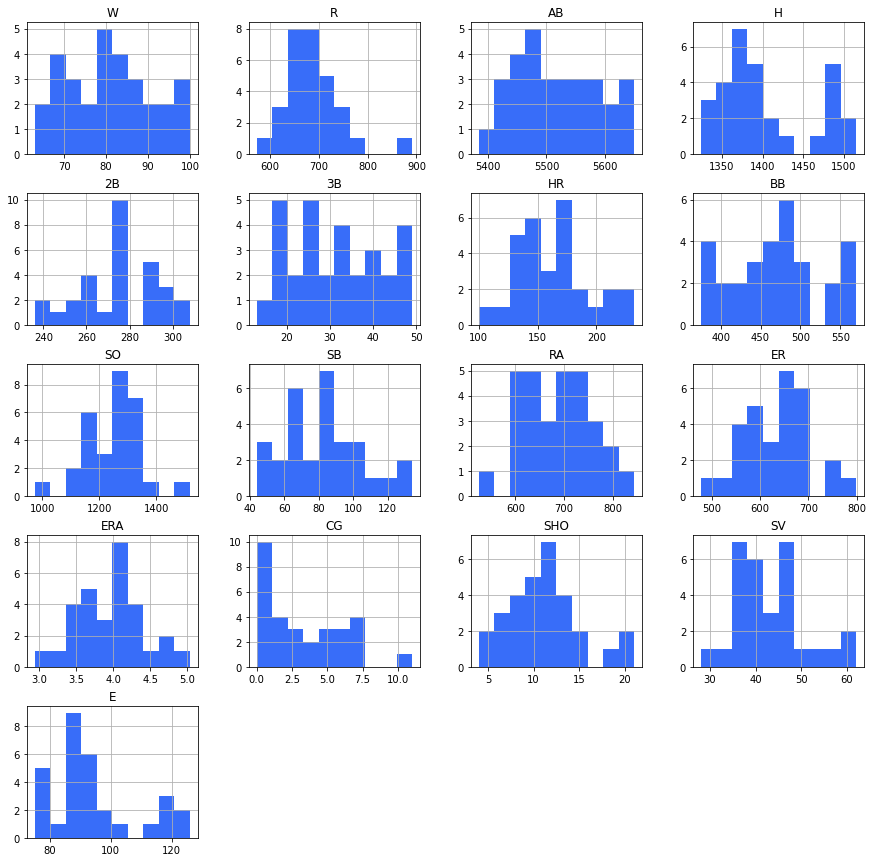

In [126]:
baseBallDataSet_copy.hist(figsize=(15,15));

In [127]:
baseBallDataSet_copy.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

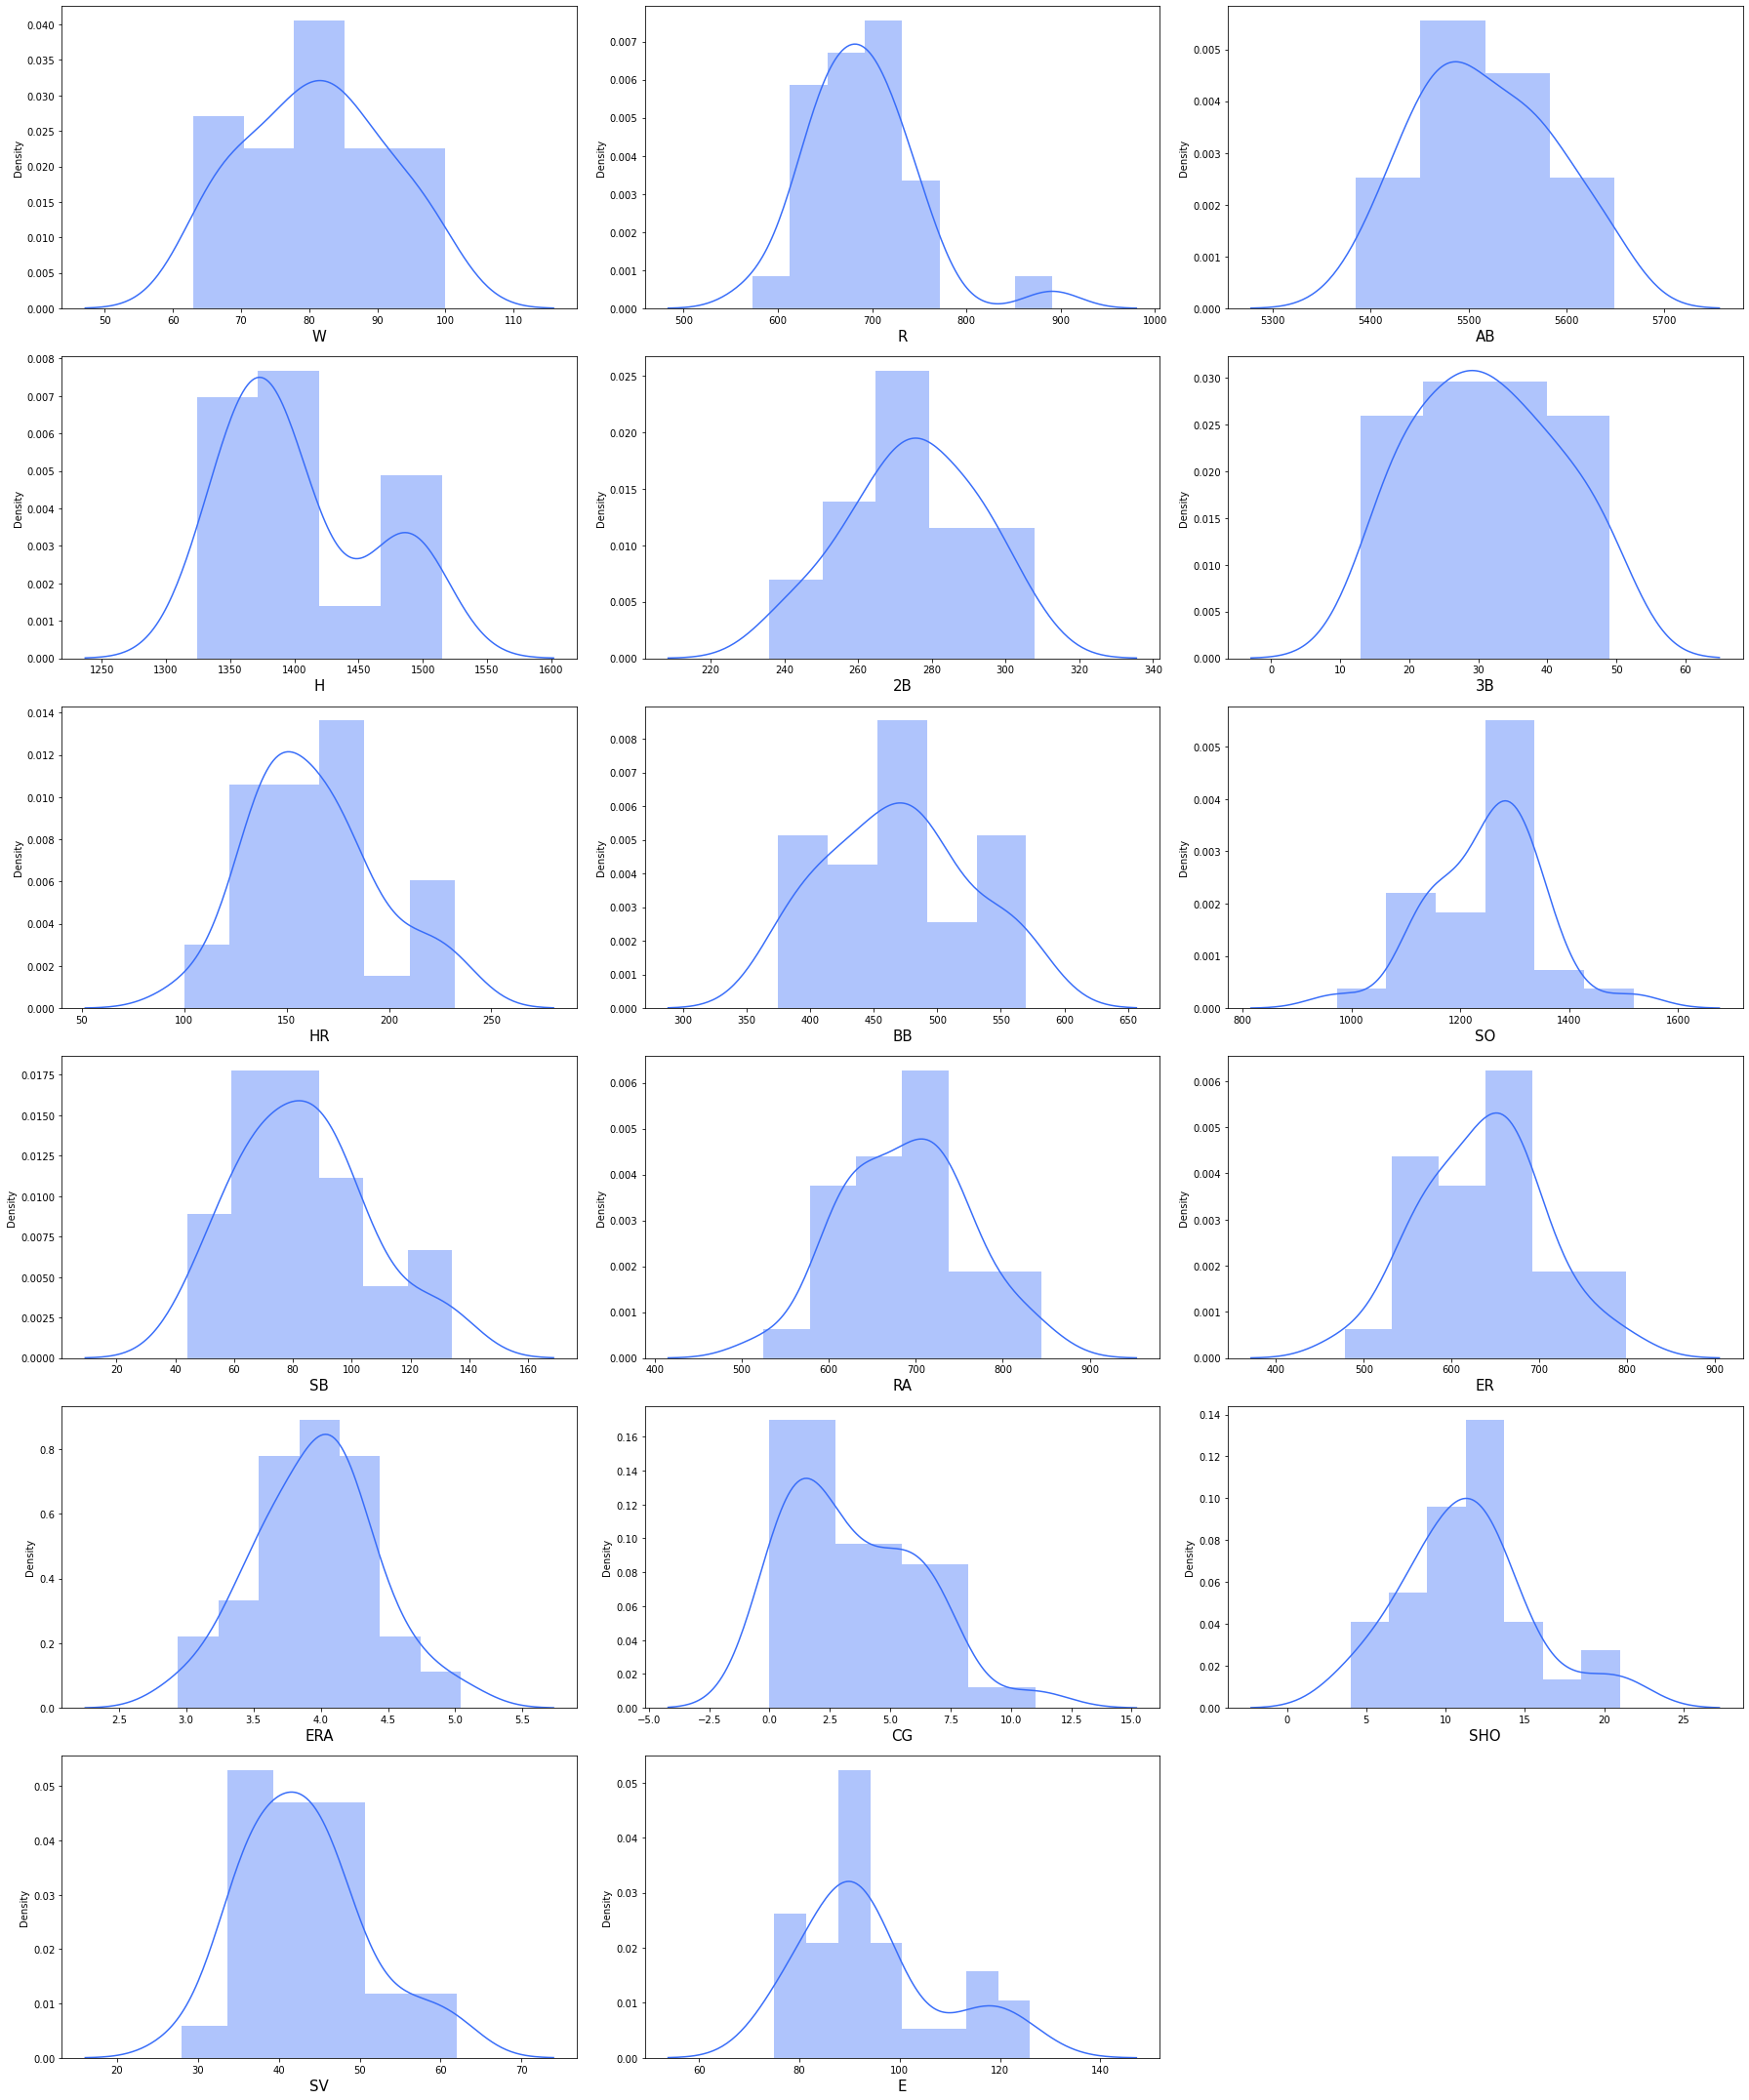

In [128]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(25,30))
for column in baseBallDataSet_copy[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']].columns:
    plt.subplot(6,3,i+1)
    sns.distplot(baseBallDataSet_copy[column])
    plt.xlabel(column,fontsize=15)
    i+=1
    
plt.tight_layout()

### Observation:Almost Every column is skewed. lets check the skewness

In [129]:
baseBallDataSet_copy.skew()*100

W        4.708869
R      120.078636
AB      18.343656
H       67.025372
2B     -23.064992
3B      12.950245
HR      51.644074
BB      15.849848
SO     -15.606548
SB      47.989287
RA       4.573398
ER       5.870980
ERA      5.333134
CG      73.684527
SHO     56.579043
SV      65.752355
E       89.013183
dtype: float64

while checking the skewness, it has been observed that many columns are above standard thresh hold , have considered 0.5 is the standard threshold, columns R, H, ER, CG, SHO, SV and E are right skewed data. we will treat the skeweness.

In [130]:
baseBallDataSet_copy.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### Bivariate Analysis

<AxesSubplot:xlabel='ER', ylabel='W'>

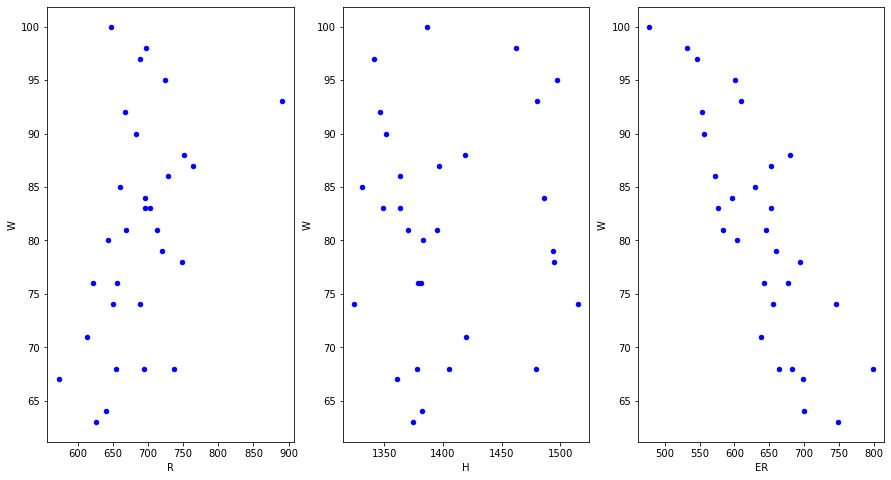

In [131]:
fig, axs = plt.subplots(1, 3)
baseBallDataSet_copy.plot(kind='scatter', x='R', y='W', color = 'blue', ax=axs[0], figsize=(15, 8))
baseBallDataSet_copy.plot(kind='scatter', x='H', y='W', color = 'blue', ax=axs[1])
baseBallDataSet_copy.plot(kind='scatter', x='ER', y='W', color = 'blue', ax=axs[2])


<AxesSubplot:xlabel='E', ylabel='W'>

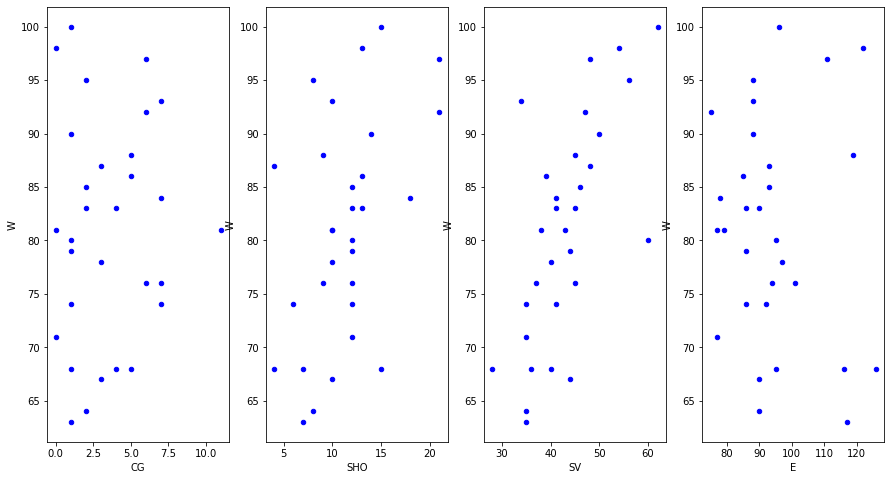

In [132]:
fig, axs = plt.subplots(1, 4)
baseBallDataSet_copy.plot(kind='scatter', x='CG', y='W', color = 'blue', ax=axs[0],figsize=(15, 8))
baseBallDataSet_copy.plot(kind='scatter', x='SHO', y='W', color = 'blue', ax=axs[1])
baseBallDataSet_copy.plot(kind='scatter', x='SV', y='W', color = 'blue', ax=axs[2])
baseBallDataSet_copy.plot(kind='scatter', x='E', y='W', color = 'blue', ax=axs[3])

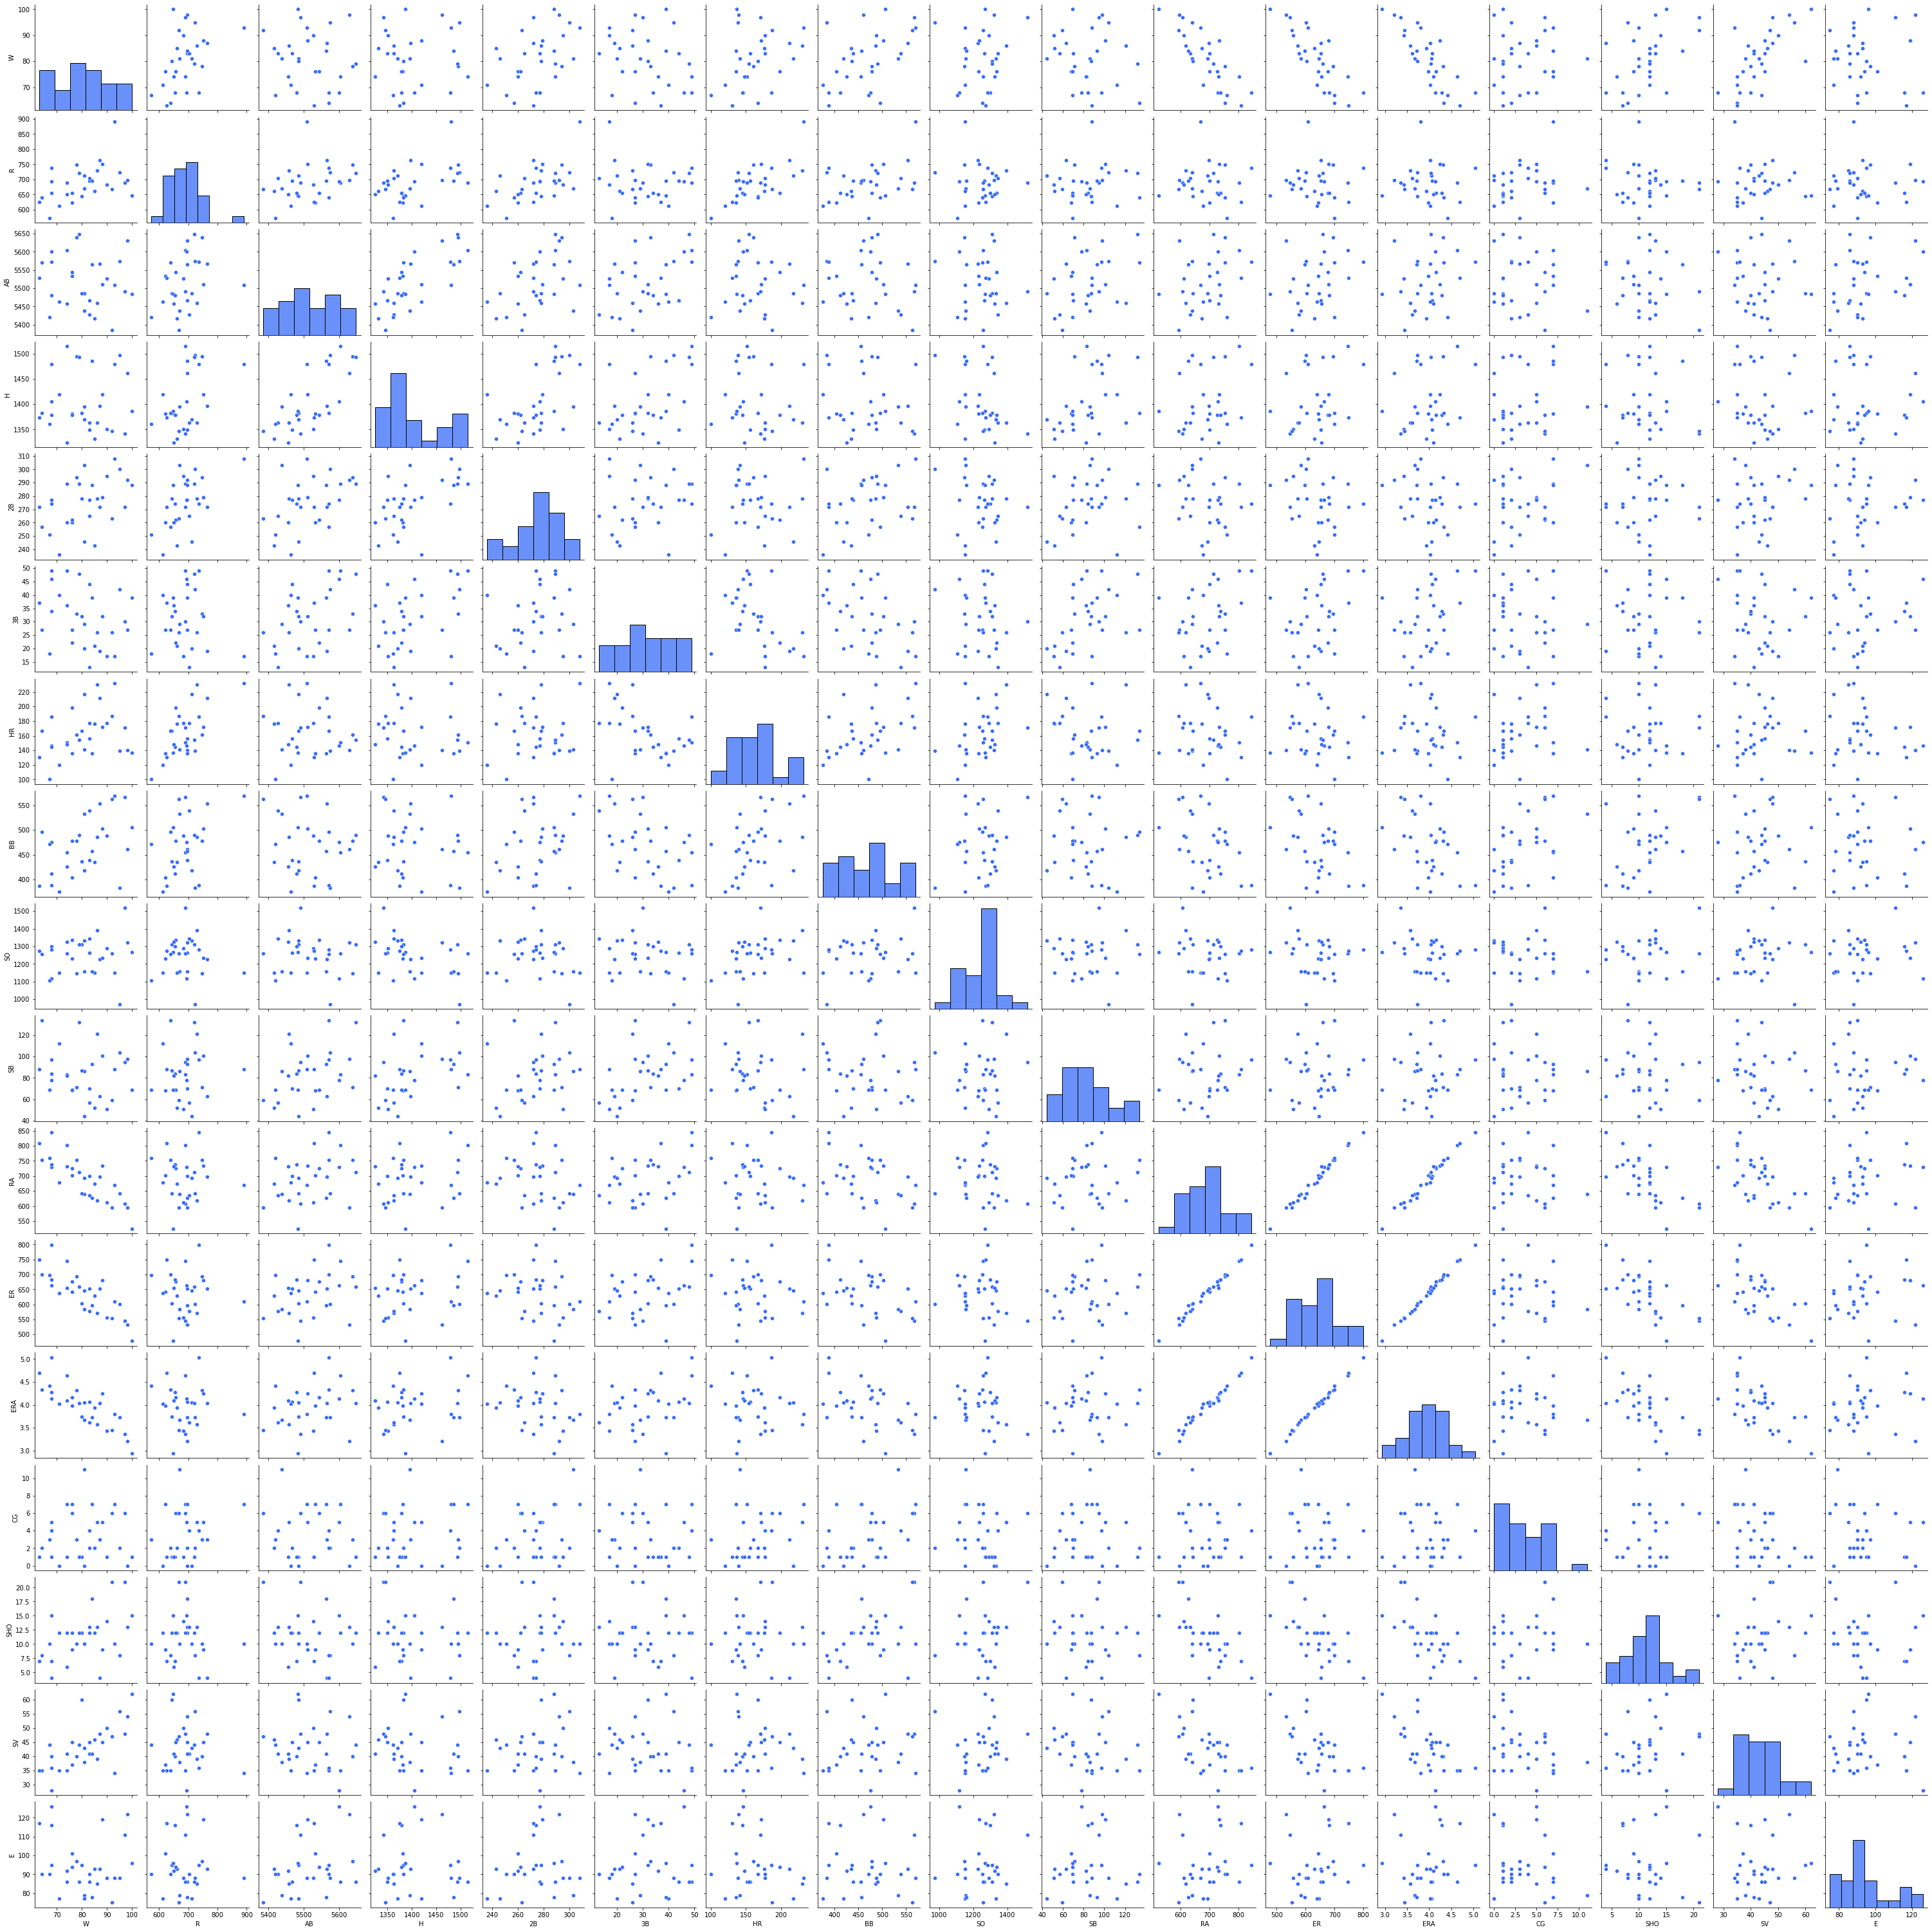

In [133]:
sns.set_palette('rainbow')
sns.pairplot(baseBallDataSet_copy)

# Step-7:let's check the outlier in the dataset 

In [134]:
baseBallDataSet_copy.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

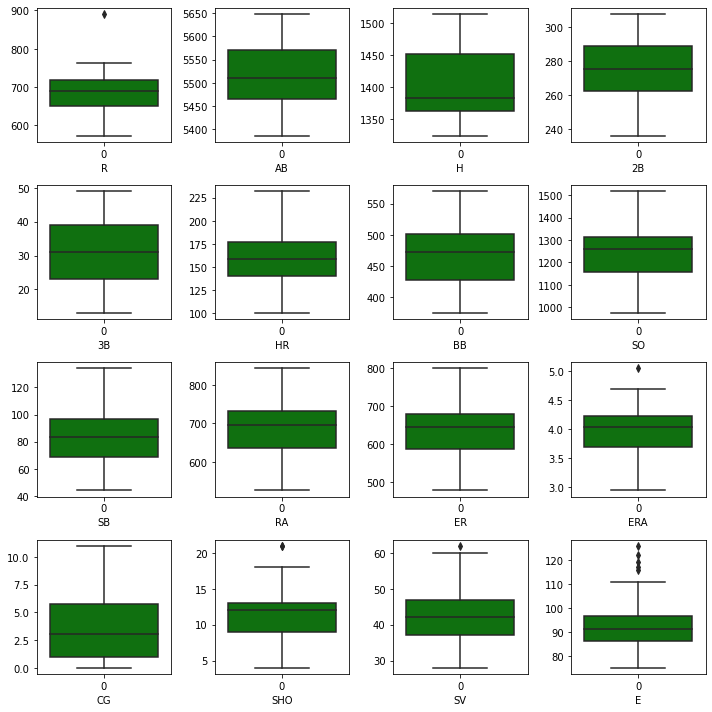

In [135]:
collist=baseBallDataSet_copy[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']].columns.values

plt.figure(figsize=(10,10))
for i in range(0,16):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=baseBallDataSet_copy[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

<AxesSubplot:>

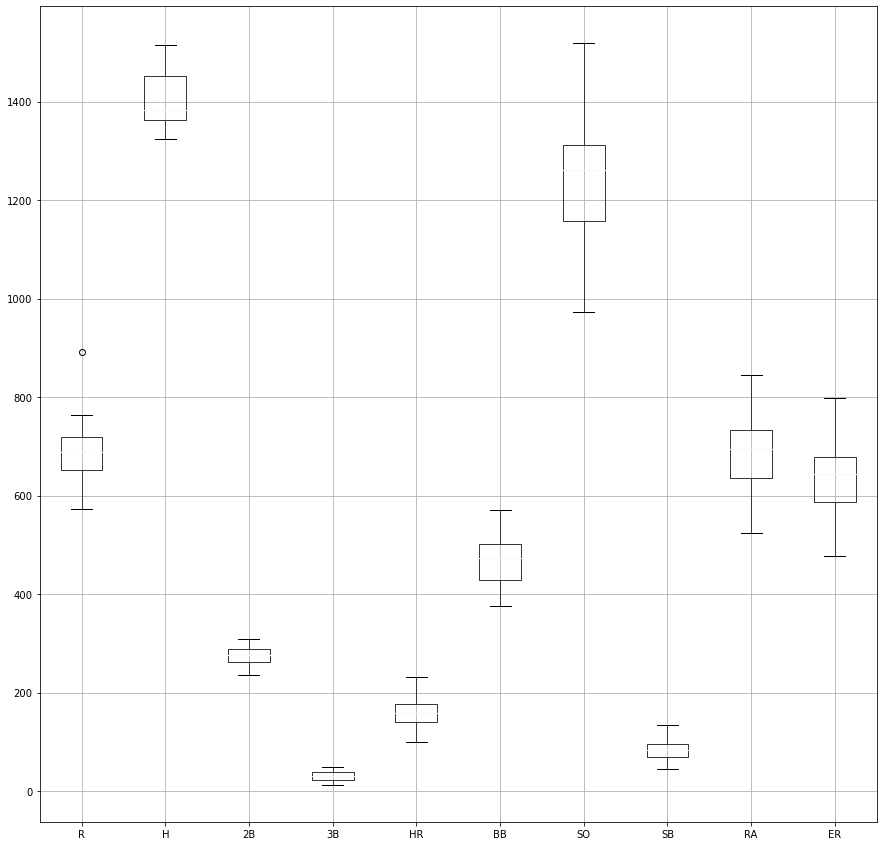

In [136]:

baseBallDataSet_copy.drop(columns =["AB","W","ERA","CG","SHO","SV","E"]).boxplot(figsize=(15,15))

<AxesSubplot:>

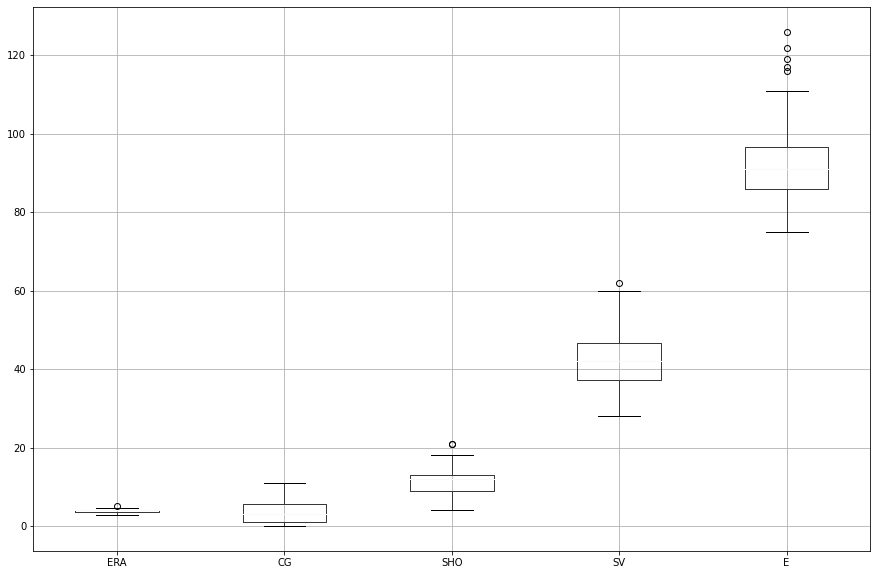

In [137]:
baseBallDataSet_copy[["ERA","CG","SHO","SV","E"]].boxplot(figsize=(15,10))


<AxesSubplot:>

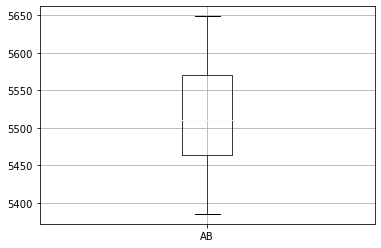

In [138]:
baseBallDataSet_copy[["AB"]].boxplot()


<AxesSubplot:>

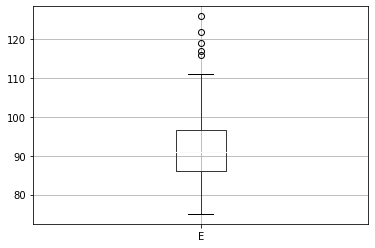

In [139]:
baseBallDataSet_copy[["E"]].boxplot()


### Observation:

E (Error) column has many outlier values,however SHO ,SV, ERA and R has few extreme value.

In [140]:
bbDataSet2 = baseBallDataSet_copy.copy()

In [141]:
z=np.abs(zscore(bbDataSet2))
bbDataSet3=bbDataSet2[(z<3).all(axis=1)]
data_loss=((bbDataSet2.shape[0]-bbDataSet3.shape[0])/bbDataSet2.shape[0])*100
print("data loss ", data_loss, " %")

data loss  3.3333333333333335  %


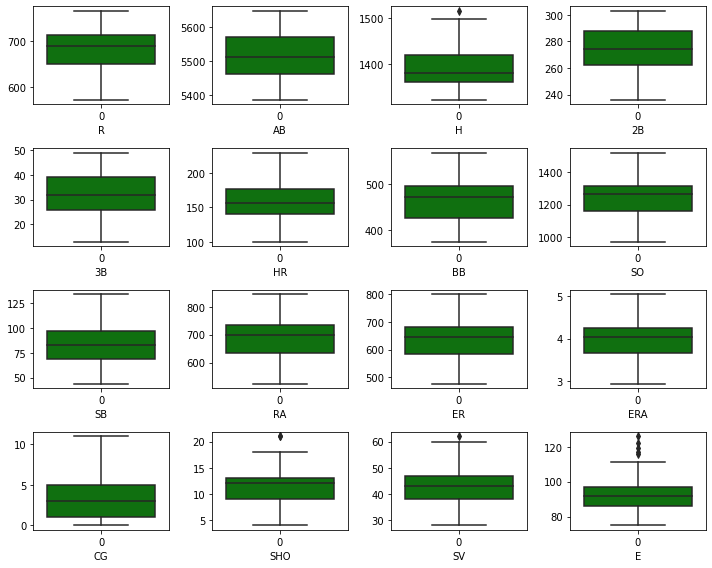

In [142]:
collist=bbDataSet3[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']].columns.values

plt.figure(figsize=(10,8))
for i in range(0,16):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=bbDataSet3[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

# Step-8:Checking Skewness

In [143]:
bbDataSet3.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [144]:
bbDataSet3.shape

(29, 17)

In [145]:
bbDataSet3.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

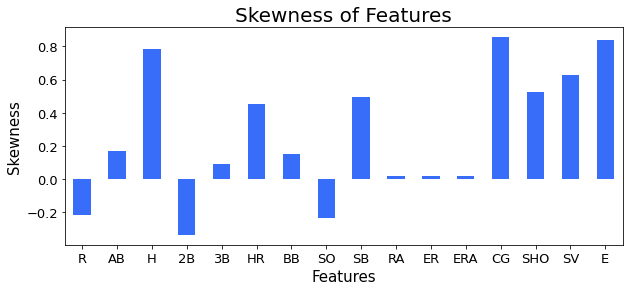

In [146]:
plt.figure(figsize=(10,4))
bbDataSet3.skew().drop(['W']).plot(kind='bar', rot = 0, fontsize=13)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('Skewness of Features', fontsize=20)
plt.show()

In [147]:
# checking zscore of a few of the columns
z_score = np.abs(zscore(baseBallDataSet_copy["E"]))

In [148]:
z_score


0     0.461470
1     0.607197
2     1.117242
3     0.485758
4     0.607197
5     0.461470
6     0.097152
7     1.262970
8     0.048576
9     0.194303
10    1.797303
11    0.680061
12    0.097152
13    0.024288
14    2.307348
15    0.121439
16    2.015894
17    1.214394
18    1.578712
19    0.315742
20    0.461470
21    0.315742
22    1.262970
23    0.315742
24    1.651576
25    1.408697
26    1.190106
27    0.607197
28    0.170015
29    0.048576
Name: E, dtype: float64

No value about 3rd sd in Error column that's why treatment isn't requirement



In [149]:
z_score1 = np.abs(zscore(baseBallDataSet_copy["R"]))
z_score1

0     0.619078
1     0.134432
2     0.332906
3     1.146419
4     0.013270
5     3.509647
6     1.311430
7     0.428681
8     0.765626
9     1.034489
10    1.086415
11    0.705622
12    0.471376
13    0.557920
14    0.099814
15    0.713699
16    0.151740
17    0.013270
18    0.575229
19    0.834861
20    0.090583
21    0.255593
22    1.302198
23    1.994550
24    1.077184
25    0.367523
26    0.134432
27    0.549843
28    0.661773
29    0.844092
Name: R, dtype: float64

we have one observation which is above 3rd SD but it wont impact on the model, so no treament is required



In [150]:
z_score2 = np.abs(zscore(baseBallDataSet_copy["ERA"]))
z_score2

0     0.506955
1     0.254598
2     0.641347
3     0.053010
4     1.531318
5     0.350165
6     0.165003
7     0.209800
8     0.484557
9     0.792164
10    0.635374
11    0.865333
12    0.036584
13    0.456185
14    0.411388
15    2.276445
16    1.671683
17    1.335704
18    0.724968
19    0.836961
20    1.178913
21    0.753340
22    0.142604
23    1.016150
24    1.643311
25    1.156515
26    0.529354
27    0.187402
28    0.299395
29    2.427263
Name: ERA, dtype: float64

ERA also doesnt have any value beyond 3rd SD.

while checking the outlier through boxplot, we have found a few of the columns have outliers values but while calculating the zscore or 3rd standard of these columns, we have got that all values are well under the 3rd standard deviation except one value in R column. Box plot calculate upper limit basis 2.7 by adding Q3 and 1.5*IQR.So no columns need treatment

In [151]:
 # applying sqrt transformation becase it has value 0 and cant applying log on it.
baseBallDataSet["CG"] = np.sqrt(baseBallDataSet["CG"])
baseBallDataSet["ER"] = np.sqrt(baseBallDataSet["ER"])
baseBallDataSet["SV"] = np.sqrt(baseBallDataSet["SV"])
baseBallDataSet["SHO"] = np.sqrt(baseBallDataSet["SHO"])

In [152]:
baseBallDataSet.skew()


W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER    -0.109548
ERA    0.053331
CG    -0.311476
SHO   -0.061761
SV     0.410288
E      0.890132
dtype: float64

In [153]:
# taking 3 columns which skewness could not corrected and applying power transform
new_data = baseBallDataSet[["R","H","E"]]
new_data = new_data.astype("float32") #change the data type of the variabel to float

In [154]:
from sklearn.preprocessing import power_transform

In [155]:
df = power_transform(new_data) # applied power_transform
df = pd.DataFrame(df) # saving into a dataframe becuase it returns numpy array
df.skew() # again checking their skewness and now it is corrected

0    0.121253
1    0.570348
2    0.068565
dtype: float32

In [156]:
new_baseball_ds =  pd.concat([baseBallDataSet,df],axis =1,join ="inner") # joining both the data points


In [157]:
new_baseball_ds.drop(columns = ["R","H","E"],axis =1, inplace= True) # dropping duplicate columns and keeping transformed columns
new_baseball_ds.rename(columns ={0:"R",1:"H",2:"E"},inplace= True) # while it has converted by power transform their name has been changed to their index to changing columns name to it name


# saving all changes into original variable

baseBallDataSetnew = new_baseball_ds.copy
baseBallDataSetnew

<bound method NDFrame.copy of       W    AB   2B  3B   HR   BB    SO   SB   RA         ER   ERA        CG  \
0    95  5575  300  42  139  383   973  104  641  24.515301  3.73  1.414214   
1    83  5467  277  44  156  439  1264   70  700  25.553865  4.07  1.414214   
2    81  5439  303  29  141  533  1157   86  640  24.166092  3.67  3.316625   
3    76  5533  260  27  136  404  1231   68  701  25.357445  3.98  2.645751   
4    74  5605  289  49  151  455  1259   83  803  27.313001  4.64  2.645751   
5    93  5509  308  17  232  570  1151   88  670  24.677925  3.80  2.645751   
6    87  5567  272  19  212  554  1227   63  698  25.534291  4.03  1.732051   
7    81  5485  246  20  217  418  1331   44  693  25.416530  4.05  0.000000   
8    80  5485  278  32  167  436  1310   87  642  24.576411  3.74  1.000000   
9    78  5640  294  33  161  478  1148   71  753  26.343880  4.31  1.732051   
10   88  5511  279  32  172  503  1233  101  733  26.076810  4.24  2.236068   
11   86  5459  278  26

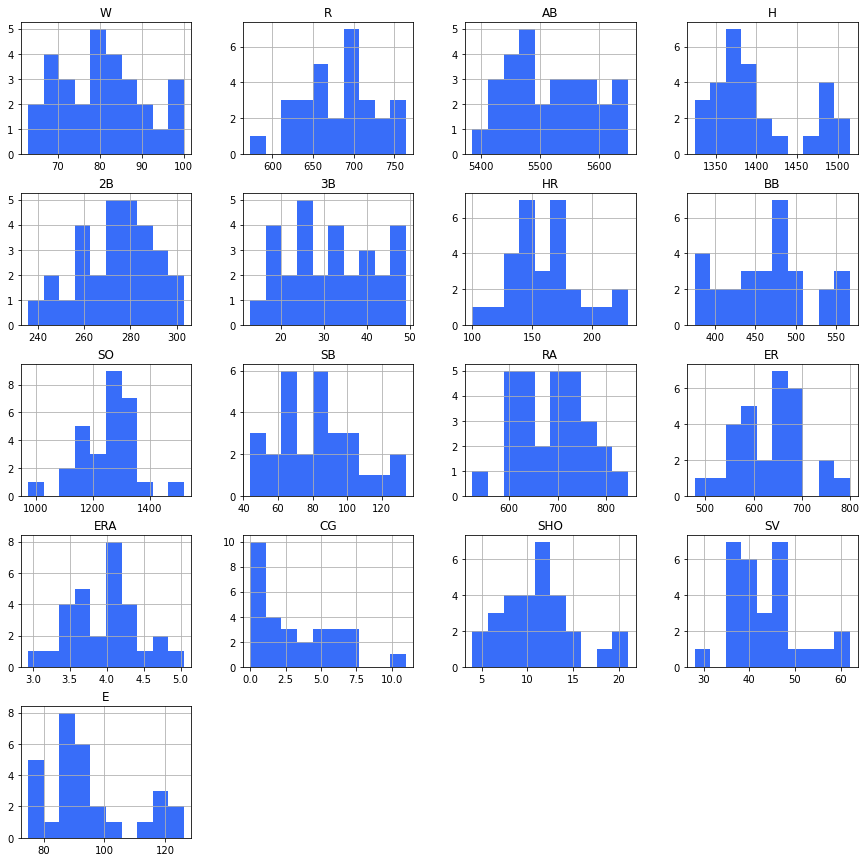

In [162]:
bbDataSet3.hist(figsize=(15,15));


<AxesSubplot:>

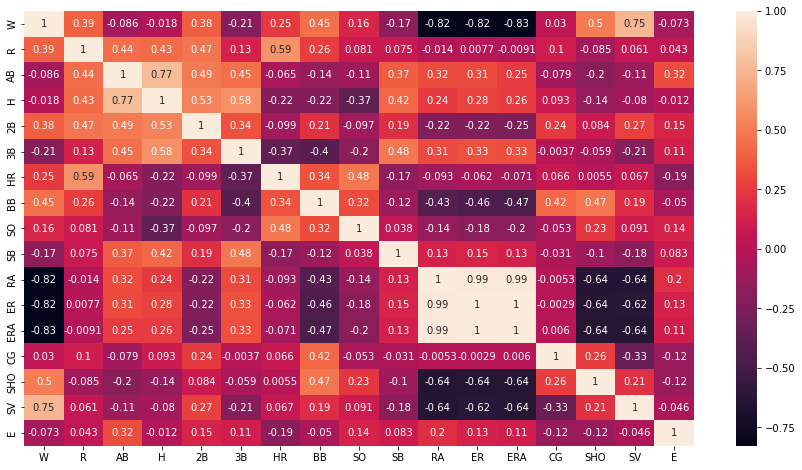

In [163]:
plt.figure(figsize=(15,8))
sns.heatmap(bbDataSet3.corr(),annot=True)

# Step-9:Modeling

In [164]:
# Dropping the most correlated columns 
baseball_ds = bbDataSet3.drop(columns=["RA","ER","AB","HR"])

In [165]:
# Seprate the data into train and test

X = baseball_ds.drop("W",axis = 1)
y = baseball_ds["W"]

# assiging some important value to a value for Adjusted R2 score
Num_predictor = X.columns
n_size  = len(X)

# appying Standard scaler on the data to bring all feature at same scale
Sc = StandardScaler()
X = Sc.fit_transform(X)

models = [LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),KNeighborsRegressor()]

In [166]:
LR = LinearRegression()
for i in range(50,200,40):
  X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = i)
  LR.fit(X_train,y_train)
  print("training_score :",LR.score(X_train,y_train),"Random_state", i )
  pred = LR.predict(X_test)
  print("Test_score : ",LR.score(X_test,y_test))
  print("Root_Mean_squared_Error",mean_squared_error(y_test,pred,squared=False))
  print("Mean_squared_Error",mean_squared_error(y_test,pred))
  print("R2_score",r2_score(y_test,pred),"\n")

training_score : 0.9183073898017253 Random_state 50
Test_score :  0.9282517593593136
Root_Mean_squared_Error 2.7634585872042776
Mean_squared_Error 7.636703363193063
R2_score 0.9282517593593136 

training_score : 0.9398386654159732 Random_state 90
Test_score :  0.7436373416223703
Root_Mean_squared_Error 3.5752037592348676
Mean_squared_Error 12.78208192004713
R2_score 0.7436373416223703 

training_score : 0.9302931759519657 Random_state 130
Test_score :  0.7389655706741332
Root_Mean_squared_Error 6.044893832207737
Mean_squared_Error 36.54074144266313
R2_score 0.7389655706741332 

training_score : 0.9492494937662979 Random_state 170
Test_score :  0.27531803928283316
Root_Mean_squared_Error 6.426161265113279
Mean_squared_Error 41.2955486052423
R2_score 0.27531803928283316 



In [167]:
from sklearn.linear_model import Lasso, Ridge
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y, test_size = 0.25, random_state = 90)

In [168]:
Las = Lasso(alpha= 1)
Las.fit(X_train1,y_train1)
print("training_score :",Las.score(X_train1,y_train1))
pred = Las.predict(X_test1)
print("Test_score : ",Las.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.883827884344348
Test_score :  0.8416445310399996
Root_Mean_squared_Error 2.8098940745475653
Mean_squared_Error 7.895504710177518
R2_score 0.8416445310399996


In [169]:
rig = Ridge(alpha= 1)
rig.fit(X_train1,y_train1)
print("training_score :" , rig.score(X_train1,y_train1))
pred = rig.predict(X_test1)
print("Test_score : ",rig.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
r2 = r2_score(y_test1,pred)
print("R2_score",r2_score(y_test1,pred))

training_score : 0.9354456701677413
Test_score :  0.8271343236946782
Root_Mean_squared_Error 2.9358090161888346
Mean_squared_Error 8.618974579535653
R2_score 0.8271343236946782


In [170]:
RR = RandomForestRegressor(n_estimators=300,max_depth=3,max_features= "sqrt")
RR.fit(X_train1,y_train1)
print("training_score :" , RR.score(X_train1,y_train1))
pred = RR.predict(X_test1)
print("Test_score : ",RR.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.8989627246061501
Test_score :  0.5032084827558587
Root_Mean_squared_Error 4.976918178460904
Mean_squared_Error 24.769714555094605
R2_score 0.5032084827558587


In [171]:
KNR = KNeighborsRegressor()
KNR.fit(X_train1,y_train1)
print("training_score :" , KNR.score(X_train1,y_train1))
pred = KNR.predict(X_test1)
print("Test_score : ",KNR.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.7255471189053766
Test_score :  0.6653588216859916
Root_Mean_squared_Error 4.084727653100022
Mean_squared_Error 16.685000000000013
R2_score 0.6653588216859916


In [172]:
Adabost = AdaBoostRegressor(n_estimators=200)
Adabost.fit(X_train1,y_train1)
print("training_score :" , Adabost.score(X_train1,y_train1))
pred = Adabost.predict(X_test1)
print("Test_score : ",Adabost.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))


training_score : 0.9973945890319469
Test_score :  0.6677983216685817
Root_Mean_squared_Error 4.069811796085362
Mean_squared_Error 16.56336805555556
R2_score 0.6677983216685817


In [173]:
GradiantBoost = GradientBoostingRegressor(n_estimators=200)
GradiantBoost.fit(X_train1,y_train1)
print("training_score :" , GradiantBoost.score(X_train1,y_train1))
pred = GradiantBoost.predict(X_test1)
print("Test_score : ",GradiantBoost.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.999999999999948
Test_score :  0.32892453223139817
Root_Mean_squared_Error 5.784410376241915
Mean_squared_Error 33.45940340077513
R2_score 0.32892453223139817


### Observation:
Data has been splitted into X and y and it has been standarized as well because saveral columns have different scale. After sepration into x and y, it has been divided into train and test with 0.2 test data and rest are all training data. i have tried multiple model on the same dara to check that which one is working fine. i ahve checked the same with Linear regression first and with multiple random state. it has been observed that random state 170 is giving more accuracy, where train and test score are too close and we can see that there is no overfitting scenario here. I have also tried lasso and ridge regression to improve the performance and we seen that lasso has given few ore point jump in both training and test score. later on, i tried ensemable techinqe and found that their performance is overfit. I have tried KNN regressor also and it has too low score,so finally i have taken lasso as the final model and appying gridsearchCV and cross validation.

In [174]:
# taking ridge as the final model
parameter = {"alpha" : [0.3,0.4,0.5,0.7,1]}
grid_lasso = Lasso()

grid_search = GridSearchCV(grid_lasso,parameter,scoring = "neg_mean_squared_error",cv = 10, n_jobs =-1, verbose = 2) 

grid_search.fit(X_train1,y_train1)
print(grid_search.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'alpha': 1}


In [175]:
best_Las = Lasso(alpha= 1)
for i in range(2,10):
  cross_score = cross_val_score(best_Las,X,y,cv = i)
  print(i,"Mean ",cross_score.mean(),"STD",cross_score.std())

2 Mean  0.684603474607472 STD 0.026676379426113894
3 Mean  0.6512976485075711 STD 0.2707459947055991
4 Mean  0.7383200984475164 STD 0.1754035013480694
5 Mean  0.42688162772816696 STD 0.7374918594654534
6 Mean  0.5392253005459416 STD 0.6670336610691745
7 Mean  0.369228627750949 STD 0.8180683074640138
8 Mean  0.5201072266037284 STD 0.5438844462169327
9 Mean  -3.2219983674915498 STD 10.59962525875568


In [176]:
cross_score = cross_val_score(best_Las,X,y,cv = 4)
print("Mean ",cross_score.mean(),"STD",cross_score.std())

Mean  0.7383200984475164 STD 0.1754035013480694


### Conclusion:-
Dataset is very small, has only 30 observations and 17 columns.it has not outlier values. A few columns were skewed. we performed treatment for skewness by applying sqrt transformation. 3 columns' skewness could not be corrected even after applying multiple transformer.
i have checked the correlation of the predictors with target column and found that couple of features were explaining less information, we observed couple of predictors were correlated with each other.i have deleted the those columns, all are expalation given in each sections.



### Modeling:- 
5 differents model are applied to the datapoint. we seen that Lasso, linear and ridge regressions are working well on the dataset, other ensemble learning are not giving overfitting.
Regularization method lasso is working well, have performed Gridseach CV and cross_val_score.

# Saving Model

In [177]:
import pickle 
best_lasso = Lasso(alpha = 1)
best_lasso.fit(X,y)
filename = "baseball_win.pkl"
with open(filename,"wb")as f:
  pickle.dump(best_lasso,f)